In [53]:
!export PATH=/Library/TeX/texbin:$PATH
import pathlib
import PIL.Image

'export' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import cv2

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.initializers import glorot_uniform

In [4]:
l="C:\\Users\\aryan\\Downloads\\MED SEG\\gaussian_filtered_images\\gaussian_filtered_images"

In [5]:
loc=pathlib.Path(l)
loc

WindowsPath('C:/Users/aryan/Downloads/MED SEG/gaussian_filtered_images/gaussian_filtered_images')

In [6]:
mild=list(loc.glob('Mild/*'))
moderate=list(loc.glob('Moderate/*'))
severe=list(loc.glob('Severe/*'))
none=list(loc.glob('No_DR/*'))
proliferate=list(loc.glob('Proliferate/*'))

In [7]:
location={
    'mild':list(loc.glob('Mild/*')),
    'moderate':list(loc.glob('Moderate/*')),
    'severe':list(loc.glob('Severe/*')),
    'none':list(loc.glob('No_DR/*'))
}

In [8]:
label={
    'mild':1,
    'moderate':2,
    'severe':3,
    'none':0
}

In [9]:
x=cv2.imread(str(location['severe'][2]))
x
x.shape

(224, 224, 3)

In [10]:
for x,y in location.items():
    print(x)
    print(len(y))

mild
370
moderate
999
severe
193
none
1805


In [11]:
x,y=[],[]
for res,pic in location.items():
    for image in pic:
        img=cv2.imread(str(image))
        x.append(cv2.resize(img,(32,32)))
        y.append(label[res])

In [12]:
len(x)

3367

In [13]:
len(y)

3367

In [14]:
x=np.array(x)
y=np.array(y)
print(x.shape)
print(y.shape)

(3367, 32, 32, 3)
(3367,)


In [15]:
print(x)

[[[[128 128 128]
   [128 128 128]
   [128 128 128]
   ...
   [128 128 128]
   [128 128 128]
   [128 128 128]]

  [[132 132 133]
   [124 124 128]
   [128 128 128]
   ...
   [128 128 128]
   [128 128 128]
   [128 128 128]]

  [[128 128 128]
   [128 128 128]
   [128 128 128]
   ...
   [128 128 128]
   [128 128 128]
   [125 125 125]]

  ...

  [[128 128 128]
   [128 128 128]
   [128 128 128]
   ...
   [128 128 128]
   [128 128 128]
   [128 129 132]]

  [[124 124 124]
   [128 128 132]
   [128 128 132]
   ...
   [128 128 128]
   [128 132 128]
   [128 128 128]]

  [[128 128 128]
   [128 128 132]
   [128 128 128]
   ...
   [128 128 128]
   [128 128 128]
   [128 128 128]]]


 [[[124 124 124]
   [128 128 128]
   [128 128 128]
   ...
   [128 132 128]
   [128 128 128]
   [128 128 128]]

  [[128 128 128]
   [128 128 128]
   [128 128 128]
   ...
   [128 128 128]
   [128 128 128]
   [133 137 129]]

  [[128 128 128]
   [128 132 128]
   [128 128 128]
   ...
   [128 132 128]
   [128 128 128]
   [128 128

In [16]:
print(y)

[1 1 1 ... 0 0 0]


In [17]:
x=x/255

In [18]:
print(x)

[[[[0.50196078 0.50196078 0.50196078]
   [0.50196078 0.50196078 0.50196078]
   [0.50196078 0.50196078 0.50196078]
   ...
   [0.50196078 0.50196078 0.50196078]
   [0.50196078 0.50196078 0.50196078]
   [0.50196078 0.50196078 0.50196078]]

  [[0.51764706 0.51764706 0.52156863]
   [0.48627451 0.48627451 0.50196078]
   [0.50196078 0.50196078 0.50196078]
   ...
   [0.50196078 0.50196078 0.50196078]
   [0.50196078 0.50196078 0.50196078]
   [0.50196078 0.50196078 0.50196078]]

  [[0.50196078 0.50196078 0.50196078]
   [0.50196078 0.50196078 0.50196078]
   [0.50196078 0.50196078 0.50196078]
   ...
   [0.50196078 0.50196078 0.50196078]
   [0.50196078 0.50196078 0.50196078]
   [0.49019608 0.49019608 0.49019608]]

  ...

  [[0.50196078 0.50196078 0.50196078]
   [0.50196078 0.50196078 0.50196078]
   [0.50196078 0.50196078 0.50196078]
   ...
   [0.50196078 0.50196078 0.50196078]
   [0.50196078 0.50196078 0.50196078]
   [0.50196078 0.50588235 0.51764706]]

  [[0.48627451 0.48627451 0.48627451]
   [0.5

In [19]:
print(x)

[[[[0.50196078 0.50196078 0.50196078]
   [0.50196078 0.50196078 0.50196078]
   [0.50196078 0.50196078 0.50196078]
   ...
   [0.50196078 0.50196078 0.50196078]
   [0.50196078 0.50196078 0.50196078]
   [0.50196078 0.50196078 0.50196078]]

  [[0.51764706 0.51764706 0.52156863]
   [0.48627451 0.48627451 0.50196078]
   [0.50196078 0.50196078 0.50196078]
   ...
   [0.50196078 0.50196078 0.50196078]
   [0.50196078 0.50196078 0.50196078]
   [0.50196078 0.50196078 0.50196078]]

  [[0.50196078 0.50196078 0.50196078]
   [0.50196078 0.50196078 0.50196078]
   [0.50196078 0.50196078 0.50196078]
   ...
   [0.50196078 0.50196078 0.50196078]
   [0.50196078 0.50196078 0.50196078]
   [0.49019608 0.49019608 0.49019608]]

  ...

  [[0.50196078 0.50196078 0.50196078]
   [0.50196078 0.50196078 0.50196078]
   [0.50196078 0.50196078 0.50196078]
   ...
   [0.50196078 0.50196078 0.50196078]
   [0.50196078 0.50196078 0.50196078]
   [0.50196078 0.50588235 0.51764706]]

  [[0.48627451 0.48627451 0.48627451]
   [0.5

In [20]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=5,test_size=0.1)

In [21]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(3030, 32, 32, 3)
(337, 32, 32, 3)
(3030,)
(337,)


                                                        ANN

In [22]:
ann2=keras.Sequential([keras.layers.Dense(100,activation='relu'),
                      keras.layers.Flatten(),
                      keras.layers.Dropout(0.2),
                      keras.layers.BatchNormalization(),
                      keras.layers.Dense(50,activation='sigmoid'),
                      keras.layers.Dense(4,activation='softmax')])
ann2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [23]:
ann2.fit(xtrain,ytrain,epochs=5,batch_size=100)

Epoch 1/5
31/31 [==============================] - 10s 307ms/step - loss: 0.6738 - accuracy: 0.7442
Epoch 2/5
31/31 [==============================] - 9s 306ms/step - loss: 0.5169 - accuracy: 0.8030
Epoch 3/5
31/31 [==============================] - 10s 326ms/step - loss: 0.4495 - accuracy: 0.8251
Epoch 4/5
31/31 [==============================] - 10s 311ms/step - loss: 0.3549 - accuracy: 0.8756
Epoch 5/5
31/31 [==============================] - 10s 336ms/step - loss: 0.2747 - accuracy: 0.9033


In [24]:
cnn = keras.Sequential([
    layers.Conv2D(filters=32,input_shape=(32,32,3), kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(8, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(4, activation='softmax')
])
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [25]:
cnn.fit(xtrain,ytrain,epochs=20,batch_size=100)

Epoch 1/20
31/31 [==============================] - 2s 48ms/step - loss: 1.1296 - accuracy: 0.5211
Epoch 2/20
31/31 [==============================] - 1s 48ms/step - loss: 1.0454 - accuracy: 0.5373
Epoch 3/20
31/31 [==============================] - 2s 49ms/step - loss: 0.8716 - accuracy: 0.6426
Epoch 4/20
31/31 [==============================] - 2s 50ms/step - loss: 0.7844 - accuracy: 0.7168
Epoch 5/20
31/31 [==============================] - 1s 44ms/step - loss: 0.7373 - accuracy: 0.7343
Epoch 6/20
31/31 [==============================] - 1s 47ms/step - loss: 0.6946 - accuracy: 0.7465
Epoch 7/20
31/31 [==============================] - 2s 52ms/step - loss: 0.6707 - accuracy: 0.7455
Epoch 8/20
31/31 [==============================] - 2s 58ms/step - loss: 0.6571 - accuracy: 0.7545
Epoch 9/20
31/31 [==============================] - 2s 51ms/step - loss: 0.6308 - accuracy: 0.7644
Epoch 10/20
31/31 [==============================] - 1s 48ms/step - loss: 0.6314 - accuracy: 0.7591
Epoch 11/

In [26]:
pred=cnn.predict(xtest)

In [27]:
import seaborn as sns

In [28]:
pred.shape

(337, 4)

In [29]:
ytest.shape

(337,)

In [30]:
predict_class = np.argmax(pred, axis=1)
predict_class = predict_class.tolist()
predict_class

[1,
 0,
 2,
 0,
 2,
 0,
 1,
 2,
 0,
 0,
 0,
 1,
 1,
 2,
 0,
 0,
 2,
 0,
 0,
 2,
 2,
 0,
 0,
 2,
 0,
 2,
 0,
 0,
 1,
 0,
 2,
 2,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 0,
 0,
 2,
 0,
 0,
 2,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 2,
 0,
 0,
 2,
 0,
 0,
 0,
 1,
 2,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 2,
 2,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 2,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 2,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 1,
 0,
 1,
 0,
 2,
 1,
 0,
 2,
 0,
 0,
 2,
 0,
 0,
 2,
 0,
 0,
 0,
 2,
 0,
 2,
 2,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 1,
 0,
 2,
 1,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 1,
 0,
 0,
 1,
 2,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 2,
 0,
 2,
 2,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 2,
 0,
 0,
 0,
 1,
 0,
 2,
 2,
 2,
 0,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 1,
 0,
 0,
 1,
 2,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 0,
 0,
 2,
 0,
 0,
 2,
 0,
 0,
 0,
 1,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 1,
 0,
 2,
 1,
 2,
 1,
 1,
 1,
 0,
 0,
 2,
 0,


<AxesSubplot:>

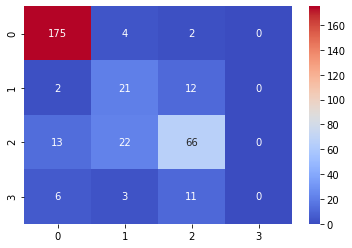

In [31]:
sns.heatmap(tf.math.confusion_matrix(ytest,predict_class),annot=True,cmap='coolwarm',fmt='d')

In [32]:
cnn=keras.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation = 'relu', kernel_initializer=glorot_uniform),
    layers.Dropout(rate=0.2),
    layers.MaxPooling2D((2,2)),
                        
    layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', activation = 'relu', kernel_initializer=glorot_uniform),
    layers.Dropout(rate=0.2),
    layers.MaxPooling2D((2,2)),
    
    
    layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', activation = 'relu', kernel_initializer = glorot_uniform),
    layers.Dropout(rate=0.2),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=128, kernel_size=(3,3), padding='same', activation = 'relu', kernel_initializer = glorot_uniform),
  layers.Dropout(rate=0.2),
  layers.Flatten(),
  layers.Dense(units=2048, activation='relu'),
  layers.Dropout(rate=0.2),
  layers.Dense(units=1024, activation='relu'),
  layers.Dropout(rate=0.2),
  layers.Dense(units=512, activation='relu'),
  layers.Dropout(rate=0.2),
  layers.Dense(4, activation='softmax', kernel_initializer = glorot_uniform)

])

In [33]:
cnn.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [35]:
checkpoint_filepath = "best_model"
history = cnn.fit(xtrain, ytrain, epochs = 10, batch_size = 32)

Epoch 1/10
95/95 [==============================] - 10s 94ms/step - loss: 0.9793 - accuracy: 0.5828
Epoch 2/10
95/95 [==============================] - 9s 95ms/step - loss: 0.6991 - accuracy: 0.7403
Epoch 3/10
95/95 [==============================] - 9s 93ms/step - loss: 0.6555 - accuracy: 0.7581
Epoch 4/10
95/95 [==============================] - 9s 92ms/step - loss: 0.6020 - accuracy: 0.7809
Epoch 5/10
95/95 [==============================] - 9s 96ms/step - loss: 0.5803 - accuracy: 0.7795
Epoch 6/10
95/95 [==============================] - 9s 97ms/step - loss: 0.5744 - accuracy: 0.7792
Epoch 7/10
95/95 [==============================] - 9s 94ms/step - loss: 0.5788 - accuracy: 0.7818
Epoch 8/10
95/95 [==============================] - 9s 93ms/step - loss: 0.5792 - accuracy: 0.7772
Epoch 9/10
95/95 [==============================] - 9s 94ms/step - loss: 0.5464 - accuracy: 0.7934
Epoch 10/10
95/95 [==============================] - 9s 95ms/step - loss: 0.5593 - accuracy: 0.7888


<AxesSubplot:>

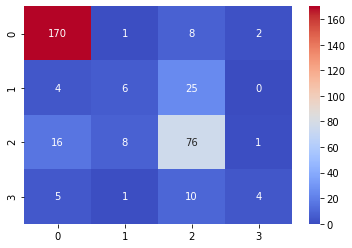

In [38]:
pred5=cnn.predict(xtest)
pc = np.argmax(pred5, axis=1)
pc = pc.tolist()
sns.heatmap(tf.math.confusion_matrix(ytest,pc),annot=True,cmap='coolwarm',fmt='d')

In [36]:
cnntest = keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(32,32,3)),
    layers.experimental.preprocessing.RandomContrast(factor=0.2),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.Conv2D(filters=32,input_shape=(32,32,3), kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((3, 3)),
    layers.Conv2D(64, 5, padding='same', activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.05),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(8, activation='relu'),
    layers.Dense(4, activation='softmax')
])
cnntest.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [37]:
cnntest.fit(xtrain,ytrain,epochs=10,batch_size=100,validation_split=0.2,shuffle=True)

Epoch 1/10
25/25 [==============================] - 2s 73ms/step - loss: 1.2231 - accuracy: 0.5260 - val_loss: 1.0877 - val_accuracy: 0.5429
Epoch 2/10
25/25 [==============================] - 2s 67ms/step - loss: 1.1234 - accuracy: 0.5342 - val_loss: 1.0405 - val_accuracy: 0.5429
Epoch 3/10
25/25 [==============================] - 2s 69ms/step - loss: 1.0704 - accuracy: 0.5347 - val_loss: 0.9762 - val_accuracy: 0.5429
Epoch 4/10
25/25 [==============================] - 2s 66ms/step - loss: 1.0202 - accuracy: 0.5347 - val_loss: 1.3062 - val_accuracy: 0.5429
Epoch 5/10
25/25 [==============================] - 2s 67ms/step - loss: 1.0425 - accuracy: 0.5454 - val_loss: 0.9419 - val_accuracy: 0.5429
Epoch 6/10
25/25 [==============================] - 2s 72ms/step - loss: 0.9377 - accuracy: 0.5540 - val_loss: 1.0892 - val_accuracy: 0.5429
Epoch 7/10
25/25 [==============================] - 2s 71ms/step - loss: 0.9183 - accuracy: 0.6291 - val_loss: 0.9216 - val_accuracy: 0.5660
Epoch 8/10
25

<AxesSubplot:>

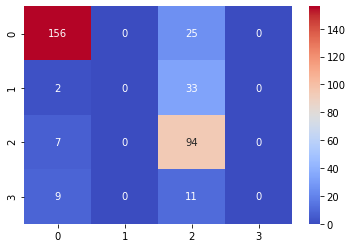

In [39]:
pred2=cnntest.predict(xtest)
pc = np.argmax(pred2, axis=1)
pc = pc.tolist()
sns.heatmap(tf.math.confusion_matrix(ytest,pc),annot=True,cmap='coolwarm',fmt='d')

In [ ]:
cnntest.evaluate(xtest,ytest)

In [ ]:
tf.math.confusion_matrix(ytest,pc)

In [ ]:
cnntest.summary()

conv pool conv pool

In [40]:
cnn3 = keras.Sequential([
    layers.Conv2D(32, input_shape=(32,32,3),kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2),strides=2),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2),strides=2),
    layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2),strides=2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(4, activation='softmax')
])
cnn3.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [41]:
cnn3.fit(xtrain,ytrain,epochs=20,batch_size=100)

Epoch 1/20
31/31 [==============================] - 2s 52ms/step - loss: 1.0994 - accuracy: 0.5205
Epoch 2/20
31/31 [==============================] - 2s 50ms/step - loss: 0.9300 - accuracy: 0.6056
Epoch 3/20
31/31 [==============================] - 2s 52ms/step - loss: 0.7921 - accuracy: 0.7158
Epoch 4/20
31/31 [==============================] - 2s 49ms/step - loss: 0.7354 - accuracy: 0.7287
Epoch 5/20
31/31 [==============================] - 2s 49ms/step - loss: 0.6894 - accuracy: 0.7459
Epoch 6/20
31/31 [==============================] - 2s 49ms/step - loss: 0.6802 - accuracy: 0.7475
Epoch 7/20
31/31 [==============================] - 2s 49ms/step - loss: 0.6799 - accuracy: 0.7436
Epoch 8/20
31/31 [==============================] - 2s 49ms/step - loss: 0.6583 - accuracy: 0.7531
Epoch 9/20
31/31 [==============================] - 2s 49ms/step - loss: 0.6393 - accuracy: 0.7594
Epoch 10/20
31/31 [==============================] - 2s 50ms/step - loss: 0.6067 - accuracy: 0.7647
Epoch 11/

<AxesSubplot:>

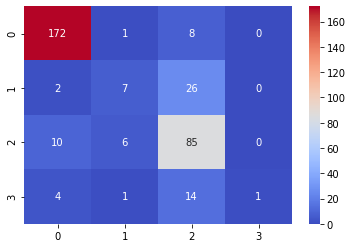

In [45]:
pred3=cnn3.predict(xtest)
pc = np.argmax(pred3, axis=1)
pc = pc.tolist()
sns.heatmap(tf.math.confusion_matrix(ytest,pc),annot=True,cmap='coolwarm',fmt='d')

In [46]:
##

In [47]:
x2 = keras.Sequential([
    layers.Conv2D(16, kernel_size=(3, 3), activation='relu',padding='same',input_shape=(32,32,3)),
    layers.Conv2D(16, kernel_size=(3, 3), activation='relu',padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2),strides=2),
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2),strides=2),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [48]:
x2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [49]:
x2.fit(xtrain,ytrain,epochs=20,batch_size=100)

Epoch 1/20
31/31 [==============================] - 3s 80ms/step - loss: 1.1982 - accuracy: 0.5231
Epoch 2/20
31/31 [==============================] - 2s 79ms/step - loss: 0.8278 - accuracy: 0.6838
Epoch 3/20
31/31 [==============================] - 2s 78ms/step - loss: 0.6971 - accuracy: 0.7386
Epoch 4/20
31/31 [==============================] - 3s 87ms/step - loss: 0.6472 - accuracy: 0.7548
Epoch 5/20
31/31 [==============================] - 3s 93ms/step - loss: 0.6410 - accuracy: 0.7571
Epoch 6/20
31/31 [==============================] - 3s 105ms/step - loss: 0.6048 - accuracy: 0.7719
Epoch 7/20
31/31 [==============================] - 3s 88ms/step - loss: 0.5898 - accuracy: 0.7743
Epoch 8/20
31/31 [==============================] - 3s 84ms/step - loss: 0.5753 - accuracy: 0.7832
Epoch 9/20
31/31 [==============================] - 3s 89ms/step - loss: 0.5610 - accuracy: 0.7881
Epoch 10/20
31/31 [==============================] - 3s 81ms/step - loss: 0.5454 - accuracy: 0.7960
Epoch 11

<AxesSubplot:>

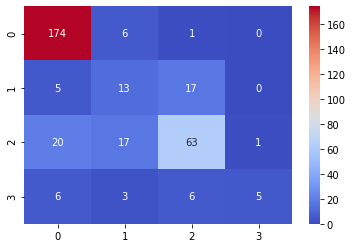

In [50]:
pred4=x2.predict(xtest)
pc = np.argmax(pred4, axis=1)
pc = pc.tolist()
sns.heatmap(tf.math.confusion_matrix(ytest,pc),annot=True,cmap='coolwarm',fmt='d')

In [51]:
print(x2.summary())
print(x2.evaluate(xtest,ytest))

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 32, 32, 16)        448       
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 32, 32, 16)        2320      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 14, 14, 32)        4640      
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 12, 12, 32)        9248      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 1152)             

In [52]:
from keras.utils import np_utils
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch
import keras_tuner as kt

<ipython-input-52-e60b6c0b890e>:4: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch
